In [15]:
import os
from pathlib import Path

# 디렉토리와 파일다루기

> 파일다루기, 파일에 관한 정보 알아내기, 데렉토리 다루기, 파일 이름 다루기를 도와주는 모듈들

# os.path
### Common pathname manipulations
### 일반적인 경로명 조작
----

### os.path 를 왜 쓸까?

- os.path 모듈을 이용하면 현재 시스템에 저장되어 있는 파일의 경로정보를 조작하거나 해당 경로에 특정 파일이 존재하는지 등의 정보를 얻을 수 있습니다.<br>

- 보통 파일의 경로(path)는 문자열로 표현하기에 경로를 조작할때에는 문자열 연산을 많이 사용하게 됩니다.<br>
- **따라서 os.path 모듈에서 대부분의 함수는 문자열을 매개변수로 받거나 결과로 문자열을 반환하게 됩니다**

# pathlib
### Object-oriented filesystem paths
### 객체 지향 파일 시스템 경로
----

### pathlib 를 왜 쓸까?
#### python 파일 입출력시 OS 호환성을 높이는 라이브러리
Python은 개발환경이 달라도 가상 머신을 통해 실행되기 때문에 다른 환경에서 같은 코드를 작성해도 거의 동일하게 작동하지만, 운영체제의 특성때문에 항상 불편하게 코딩해야 하는 부분이 바로 파일의 경로 입니다. 특히 Windows와 그 외 운영체제(macOS, Linux등)의 경로 문자가 다릅니다.

#### 파일 경로를 처리하는 이전 방식들
- os.path.join()<br>
파이썬 3.4 이전에는 os 라이브러리에 있는 os.path.join() 함수를 사용해 파일 경로 문자열을 만들었습니다. 위 두 파일 경로를 보면, Windows와 비Windows 경로 문자열의 차이는 /와 \ 차이만 있습니다. 이를 감지하고 처리하주는 함수가 os.path.join() 함수입니다. 이 함수를 사용하면 운영체제에 따라 각각 다른 슬래쉬 (/)또는 (\\)로 연결해줍니다.

In [39]:
my_path = os.path.join(os_dir_name, os_sub_dir_name, os_folder_name)
# "some_folder\some_file.txt" or "some_folder/some_file.txt"
print(my_path)

mobigen\mobigen_202103\2021파이썬스터디


다만, 위 함수를 사용하면 새로운 폴더에 들어갈 때마다 <font color='red'>매번 함수를 사용하기 때문에 이 또한 귀찮습니다</font>. pathlib 라이브러리의 다음과 같은 특징이 이러한 문제를 해결해 줄 수 있습니다.

### pathlib 특징

#### 1. pathlib 라이브러리는 파일 시스템의 경로를 단순한 string 객채로 보지않고 파일시스템 경로를 Path 객체로 활용합니다. <br>

- 기존 (os.path)의 directory 반환

In [16]:
path_dir=os.getcwd()
print(path_dir)

C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디


- pathlib을 활용해서 현재 directory 반환

In [56]:
pathlib_dir=Path.cwd()
print(pathlib_dir)

C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디


path_dir 은 스트링 객체이고, pathlib_dir은 path 객체입니다.

- 기존 (os.path)

In [43]:
print(path_dir)
print(os.path.exists(path_dir))
print(os.path.isdir(path_dir))

C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디
True
True


- pathlib 도입

In [57]:
print(pathlib_dir)
print(pathlib_dir.exists())
print(pathlib_dir.is_dir())

C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디
True
True


In [58]:
print(path_dir.is_dir())

AttributeError: 'str' object has no attribute 'is_dir'

#### 2. 파일시스템을 문자열이 아닌 객체로 다루게 되면서 얻게 된 큰 이익 중 하나는 연산자를 새롭게 정의할 수 있게 되었다는 점입니다.

In [45]:
dir_name = 'mobigen'
sub_dir_name = 'mobigen_202103'
folder_name = '2021파이썬스터디'

- 기존 (os.path) 의 os.path.join

In [46]:
os_file = os.path.join(dir_name, sub_dir_name, folder_name)
print(os_file)

mobigen\mobigen_202103\2021파이썬스터디


- pathlib 도입

pathlib은 나누기 연산자인 슬래시(/)가 경로 구분 문자로도 사용된다는 점에서 착안하여 나누기 연산자로 path를 연결하게끔 만들었습니다.<br>
이로써 더 이상 보기 싫은(?) os.path.join()와 마주치지 않아도 된다고.. 합니다.

In [60]:
dir = Path(dir_name)
path_file = dir.joinpath(sub_dir_name, folder_name)

#연산자 새롭게 정의
path_file2 = dir / sub_dir_name / folder_name

print(dir)
print(path_file)
print(path_file2)

mobigen
mobigen\mobigen_202103\2021파이썬스터디
mobigen\mobigen_202103\2021파이썬스터디


## OS path 과 pathlib 모듈의 몇가지 기능 비교
***
>그동안 os, os.path 모듈을 사용하여 파일시스템을 다뤘던 것을 일반적인 것은 다 pathlib으로 대체할 수 있습니다.<br>

1. **os.path.basename(path) vs Path.name:** <br>
    파일의 basename 을 반환하는데 쓰입니다. 이 함수는 주어진 경로로부터 파일 이름만을 반환합니다. 

- os.path

In [63]:
path_dir=os.getcwd()
print(path_dir)

C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디


In [64]:
pathlib_dir=Path.cwd()
print(pathlib_dir)

C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디


In [19]:
out = os.path.basename(path_dir)
print(out)

2021파이썬스터디


In [20]:
out=os.path.basename(pathlib_dir)
print(out)

2021파이썬스터디


In [13]:
out = os.path.basename("C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디")
print(out)

2021파이썬스터디


In [14]:
out = os.path.basename("C:/Users/haein/mobigen/mobigen_202103/2021파이썬스터디")
print(out)

2021파이썬스터디


- pathlib

In [55]:
print(pathlib_dir.name)

2021파이썬스터디


2. **os.path.dirname(path):** 주어진 경로로부터 경로 이름을 반환하는데 쓰입니다. 이 함수는 파일이름을 제외한 경로를 반환합니다.

In [21]:
out = os.path.dirname(path_dir)
print(out)

C:\Users\haein\mobigen\mobigen_202103


3. **os.path.isabs(path):** 이 함수는 해당경로가 절대경로인지 아닌지 구분해줍니다. Unix 시스템의 절대경로는 슬래시('/')로 시작하고 Windows에서는 드라이브 문자를 잘라낸 후 백슬래시('\\')로 시작합니다.

In [22]:
out = os.path.isabs(path_dir)
print(out)

True


In [7]:
out = os.path.isabs("C:\\Users")
print(out)

True


In [8]:
out = os.path.isabs("\\Users")
print(out)

True


In [23]:
out = os.path.isabs("/Users")
print(out)

True


In [24]:
out = os.path.isabs("C:/Users")
print(out)

True


4. **os.path.isdir(path):** 이 함수는 해당경로의 존재 여부를 반환한다. 

In [6]:
out = os.path.isdir("C:\\Users")
print(out)

True


5. **os.path.abspath(path):** 절대경로 반환 

In [29]:
out = os.path.abspath(path_dir)
print(out)

C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디


#### 상대 경로

현재

In [79]:
reltv_path = './'
print(os.path.abspath(reltv_path))

C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디


상위

In [34]:
reltv_path = '../'
print(os.path.abspath(reltv_path))

C:\Users\haein\mobigen\mobigen_202103


상위의 상위

In [35]:
reltv_path = '../../'
print(os.path.abspath(reltv_path))

C:\Users\haein\mobigen


In [30]:
data = "재미난 파이썬 프로그래밍"
with open("write_test.txt", "w", encoding="utf-8") as f:
    f.write(data)
    print("파일 작성 완료")


파일 작성 완료


In [31]:
data = "재미난 파이썬 프로그래밍"
with open("../write_test.txt", "w", encoding="utf-8") as f:
    f.write(data)
    print("파일 작성 완료")


파일 작성 완료


6. **os.path.join(path1, path2, path3,...)** : 파일명 연결하기

In [37]:
# 기존 문자열 방식

os_dir_name = 'mobigen'
os_sub_dir_name = 'mobigen_202103'
os_folder_name = '2021파이썬스터디'

#1. operator 이용
string_path = os_dir_name+'/'+os_sub_dir_name+'/'+os_folder_name
print(string_path, end='\n\n')

#2. python formatting...?
string_path = f'{os_dir_name}/{os_sub_dir_name}/{os_folder_name}'
print(string_path, end='\n\n')

#3. string object 내부 method 사용
string_join_path = '/'.join([os_dir_name, os_sub_dir_name, os_folder_name]) 
print(string_join_path)

mobigen/mobigen_202103/2021파이썬스터디

mobigen/mobigen_202103/2021파이썬스터디

mobigen/mobigen_202103/2021파이썬스터디


In [38]:
join_path = os.path.join(os_dir_name, os_sub_dir_name, os_folder_name)
print(join_path)

mobigen\mobigen_202103\2021파이썬스터디


#### 파일 열기

- path.open

In [48]:
filename = 'write_test.txt'

# without pathlib

file = open(filename, 'r')

# with pathlib

path = Path(filename)

file = path.open('r')

#### 파일 읽고 쓰기

- path.write_text()
- pate.write_bytes()
- Path.read_text()
- Path.read_bytes()

In [ ]:
filename = 'text.txt'

# without pathlib
file = open(filename, 'r')
r = file.read()
file.close()

# without pathlib2
with open(filename, 'r') as f:
  r = f.read()

# with pathlib
path = Path(filename)
r = path.read_text()

### path 클래스의 상속 구조

***

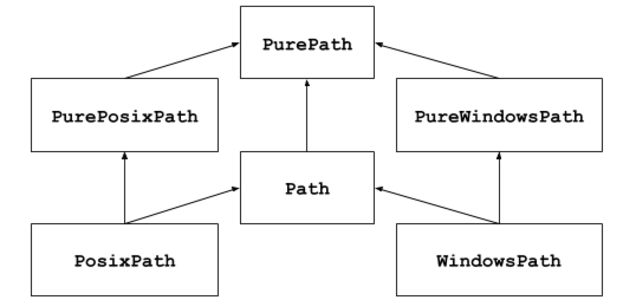

PurePath (pure paths)와 Path (concrete path)의 차이점은 I/O와 관계된 메소드를 가지는 가에 대한 여부입니다.<br>

일반적인 용도로 사용할 때에는 그냥 Path를 사용하면 됩니다. Path 오브젝트를 생성할때에 OS에 맞춘 하위 클래스를 리턴해줍니다.

In [50]:
# windows machine에서 실행한 경우
p = Path('.')
type(p)

pathlib.WindowsPath

한편, 다른 OS의 path를 다루고자 하는 경우에는 PurePath를 써야한다. 예를 들어 Windows OS에서 Unix Path를 생성하고자 하는 경우는 PosixPath()를 사용하는 대신 PurePosixPath()를 사용해야만 한다.

# glob
### Unix style pathname pattern expansion
### 유닉스 스타일 경로명 패턴 확장
----
glob 모듈은 유닉스 셸이 사용하는 규칙에 따라 지정된 패턴과 일치하는 모든 경로명을 찾습니다.

- *: 전체 매칭
- ?:  단일 문자 매칭
- [seq] seq 안에 있는 임의의 문자 매칭 (예: [abc])
- [!seq]: sequ에 있지 않은 임의의 문자 매칭

In [66]:
import glob

In [73]:
out=glob.glob(os.path.join(path_dir,'*.txt'))
print(out)

['C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디\\write_test.txt']


In [75]:
out=glob.glob(os.path.join(path_dir,'*.ipynb'))
print(out)

['C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디\\week_04.ipynb', 'C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디\\과제1_ O(n) 단어수 세는 프로그래밍.ipynb', 'C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디\\보충1_Object (객체).ipynb', 'C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디\\보충4_객체지향 VS 함수형.ipynb', 'C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디\\보충4_람다함수.ipynb', 'C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디\\보충4_반복과 이터레이션.ipynb', 'C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디\\보충4_클래스 CLASS, 인스턴스, 객체.ipynb', 'C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디\\보충4_함수.ipynb', 'C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디\\스터디1_Built-in Types, Buit-in Exception.ipynb', 'C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디\\스터디2_Text  Processing Services, Binary Data Services.ipynb', 'C:\\Users\\haein\\mobigen\\mobigen_202103\\2021파이썬스터디\\스터디3_Data Type -datetime, collections, copy.ipynb', 'C:\\Users\\haein\\mobigen\\mobigen_202103

### iglob(pathname, *, recursive=False)

iglob는 glob()와 동일한 값을 반환하는 iterator를 반환합니다. <br>
list object 를 저장하지 않고 iterable 한 generator 를 사용하면 메모리의 사용량을 줄일 수 있습니다.

In [ ]:
from glob import iglob

`'**'`패턴의 의미는 현재 디렉토리와 모든 하위 디렉토리의 반복을 의미합니다. <br>
대형 디렉토리 트리에서 `"**" `패턴을 사용하면 과도한 시간이 소요될 수 있습니다.

In [94]:
for file in iglob(os.path.join(path_dir,'**/*.ipynb'), recursive=True):
    print(file)

C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\week_04.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\과제1_ O(n) 단어수 세는 프로그래밍.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\보충1_Object (객체).ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\보충4_객체지향 VS 함수형.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\보충4_람다함수.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\보충4_반복과 이터레이션.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\보충4_클래스 CLASS, 인스턴스, 객체.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\보충4_함수.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\스터디1_Built-in Types, Buit-in Exception.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\스터디2_Text  Processing Services, Binary Data Services.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\스터디3_Data Type -datetime, collections, copy.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\스터디4_1_Functional Programming Modules.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\

In [103]:
for file in iglob(path_dir+'/**/*.ipynb', recursive=True):
    print(file)

C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\week_04.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\과제1_ O(n) 단어수 세는 프로그래밍.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\보충1_Object (객체).ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\보충4_객체지향 VS 함수형.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\보충4_람다함수.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\보충4_반복과 이터레이션.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\보충4_클래스 CLASS, 인스턴스, 객체.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\보충4_함수.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\스터디1_Built-in Types, Buit-in Exception.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\스터디2_Text  Processing Services, Binary Data Services.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\스터디3_Data Type -datetime, collections, copy.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\스터디4_1_Functional Programming Modules.ipynb
C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디\

In [106]:
print(Path.cwd())

C:\Users\haein\mobigen\mobigen_202103\2021파이썬스터디


In [107]:
for file in iglob('./**/*.ipynb', recursive=True):
    print(file)

.\week_04.ipynb
.\과제1_ O(n) 단어수 세는 프로그래밍.ipynb
.\보충1_Object (객체).ipynb
.\보충4_객체지향 VS 함수형.ipynb
.\보충4_람다함수.ipynb
.\보충4_반복과 이터레이션.ipynb
.\보충4_클래스 CLASS, 인스턴스, 객체.ipynb
.\보충4_함수.ipynb
.\스터디1_Built-in Types, Buit-in Exception.ipynb
.\스터디2_Text  Processing Services, Binary Data Services.ipynb
.\스터디3_Data Type -datetime, collections, copy.ipynb
.\스터디4_1_Functional Programming Modules.ipynb
.\스터디4_2_File and directory Access.ipynb
.\참고1_텍스트 빈도 분석 (엑셀 내용 추출 및 텍스트 저장, 정제, 빈도카운트, 워드클라우드 등)_한길.ipynb
.\mobigen-python-study-2021\week05\presentation\python_presen01.ipynb
.\mobigen-python-study-2021\week05\presentation\python_presen02_j.ipynb
.\mobigen-python-study-2021\week05\presentation\python_presen03.ipynb
.\mobigen-python-study-2021\week06\presentation\week_04_hi.ipynb


In [104]:
for file in iglob('./**/*.ipynb', recursive=False):
    print(file)

### pathlib glob

In [81]:
p=Path(".")
[x for x in p.iterdir() if x.is_dir()]

[WindowsPath('.ipynb_checkpoints'),
 WindowsPath('2주차_BuiltInType'),
 WindowsPath('mobigen-python-study-2021')]

In [83]:
list(p.glob('**/*.ipynb'))

[WindowsPath('week_04.ipynb'),
 WindowsPath('과제1_ O(n) 단어수 세는 프로그래밍.ipynb'),
 WindowsPath('보충1_Object (객체).ipynb'),
 WindowsPath('보충4_객체지향 VS 함수형.ipynb'),
 WindowsPath('보충4_람다함수.ipynb'),
 WindowsPath('보충4_반복과 이터레이션.ipynb'),
 WindowsPath('보충4_클래스 CLASS, 인스턴스, 객체.ipynb'),
 WindowsPath('보충4_함수.ipynb'),
 WindowsPath('스터디1_Built-in Types, Buit-in Exception.ipynb'),
 WindowsPath('스터디2_Text  Processing Services, Binary Data Services.ipynb'),
 WindowsPath('스터디3_Data Type -datetime, collections, copy.ipynb'),
 WindowsPath('스터디4_1_Functional Programming Modules.ipynb'),
 WindowsPath('스터디4_2_File and directory Access.ipynb'),
 WindowsPath('참고1_텍스트 빈도 분석 (엑셀 내용 추출 및 텍스트 저장, 정제, 빈도카운트, 워드클라우드 등)_한길.ipynb'),
 WindowsPath('.ipynb_checkpoints/week_04-checkpoint.ipynb'),
 WindowsPath('.ipynb_checkpoints/과제1_ O(n) 단어수 세는 프로그래밍-checkpoint.ipynb'),
 WindowsPath('.ipynb_checkpoints/보충1_Object (객체)-checkpoint.ipynb'),
 WindowsPath('.ipynb_checkpoints/보충4_객체지향 VS 함수형-checkpoint.ipynb'),
 WindowsPath('.ipynb_

#  Appendix

***

### 1. 파일 목록 얻기

#### (1) glob.glob(wildcard)
유닉스 경로명 패턴 스타일로 파일 목록을 얻을 수 있다.<br>
#### (2) os.listdir(path)
지정된 디렉토리의 전체 파일 목록을 얻을 수 있다.<br>
#### (3) dircache.listdir(path)
os.listdir(path)와 동일한 파일 목록을 전달한다.<br>
path가 변경되지 않았을 때, dircache.listdir()은 다시 디렉토리 구조를 읽지 않고 이미 읽은 정보를 활용
#### dircache.annotate(head, list)
일반 파일명과 디렉토리명을 구분해주는 함수

### 2. 디렉토리 다루기

os.chdir(path) - 작업하고 있는 디렉토리 변경<br>
os.getcwd() - 현재 프로세스의 작업 디렉토리 얻기<br>
os.remove( filename or path ) - 파일이나 디렉토리 지우기<br>
os.mkdir( path ) - 디렉토리 만들기<br>
os.makedirs( path ) - 디렉토리 만들기와 동일하지만 /tmp/include/gl/temp 처럼 긴 경로를 한번에 만들어 준다.<br>
os.path.abspath(filename) - 파일의 상대 경로를 절대 경로로 바꾸는 함수<br>
os.path.exists(filename) - 주어진 경로의 파일이 있는지 확인하는 함수<br>
os.curdir() - 현재 디렉토리 얻기<br>
os.pardir() - 부모 디렉토리 얻기<br>
os.sep() - 디렉토리 분리 문자 얻기. windows는 \ linux는 / 를 반환한다.<br>

### 4. 경로명 분리하기
os.path.basename(filename) - 파일명만 추출<br>
os.path.dirname(filename) - 디렉토리 경로 추출<br>
os.path.split(filename) - 경로와 파일명을 분리<br>
os.path.splitdrive(filename) - 드라이브명과 나머지 분리 (MS Windows의 경우)<br>
os.path.splitext(filename) - 확장자와 나머지 분리<br>